# Exploring movie data set

In [54]:
import pandas as pd 

In [55]:
dead = pd.read_csv(filepath_or_buffer = '../data/20170827-movie_stats-dead_count.csv')
dead.head()

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor
0,836,LotR: Return of the King,2003,8.9,201,1981
1,610,Kingdom of Heaven,2005,7.2,144,1977
2,600,300,2007,7.7,117,1969
3,572,Troy,2004,7.2,163,1963
4,558,The Last Samurai,2003,7.7,154,1962


In [56]:
dead_budget = pd.read_csv(filepath_or_buffer = '../data/20170828-movie_stats-dead_budget.csv')
dead_budget.head()

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor,Budget,Gross
0,836,LotR: Return of the King,2003,8.9,201,1981,94000000.0,NaN
1,610,Kingdom of Heaven,2005,7.2,144,1977,130000000.0,47396698.0
2,600,300,2007,7.7,117,1969,110000000.0,NaN
3,572,Troy,2004,7.2,163,1963,175000000.0,133228348.0
4,558,The Last Samurai,2003,7.7,154,1962,140000000.0,111110575.0


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 6)

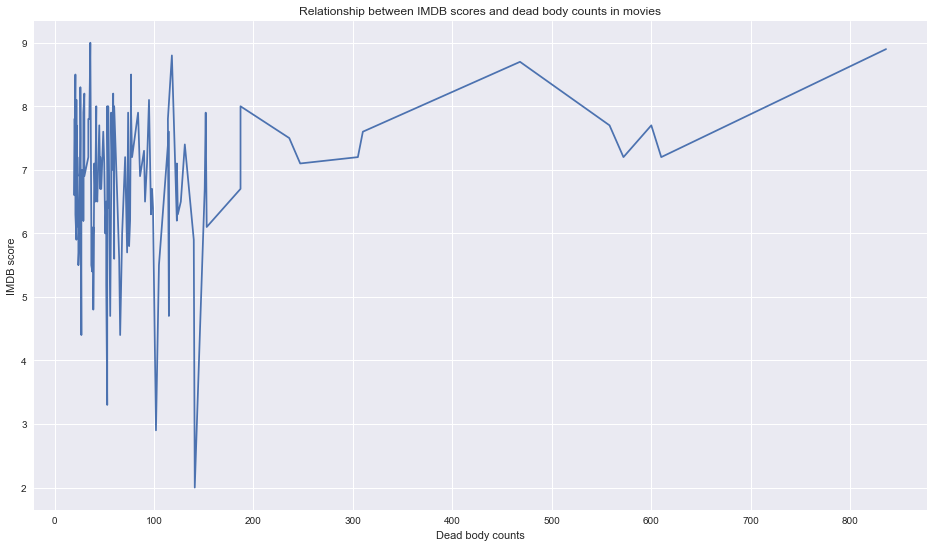

In [63]:
plt.plot(dead['Count'], dead['IMDB_score'])
plt.xlabel("Dead body counts")
plt.ylabel("IMDB score")
plt.title("Relationship between IMDB scores and dead body counts in movies")

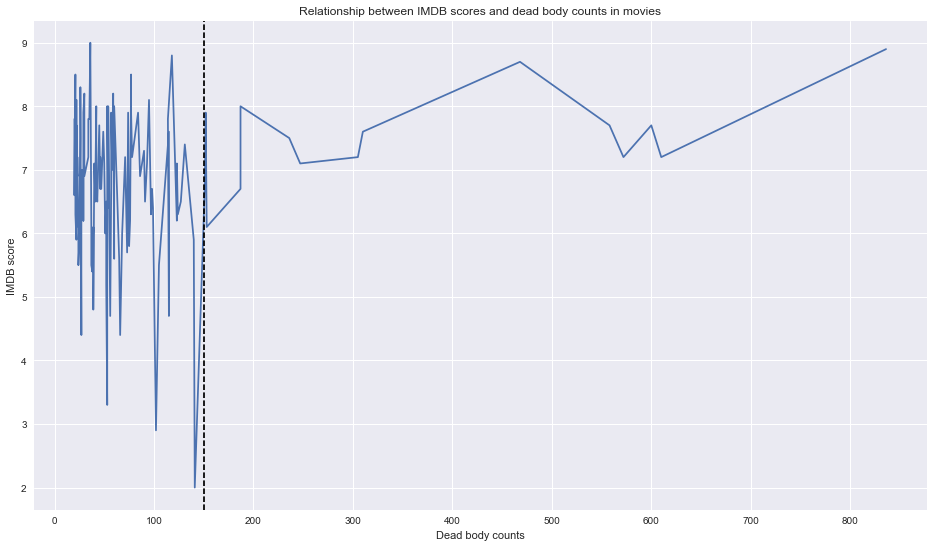

In [64]:
plt.plot(dead['Count'], dead['IMDB_score'])
plt.axvline(x = 150, color='k', linestyle='--')
plt.xlabel("Dead body counts")
plt.ylabel("IMDB score")
plt.title("Relationship between IMDB scores and dead body counts in movies")

In [65]:
dead_zoomin = dead[dead.Count <= 150]
dead_zoomin.head()

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor
15,141,House of the Dead,2003,2.0,90,1978
16,140,Blade: Trinity,2004,5.9,113,1962
17,131,Dawn of the Dead,2004,7.4,101,1979
18,127,Versus,2000,6.5,119,1975
19,124,Resident Evil: Extinction,2007,6.3,94,1975


(array([ 20.,   9.,  14.,   9.,  13.,   4.,   7.,   2.,   4.,   4.,   2.,
          3.,   4.,   2.,   2.,   0.,   3.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  20.  ,   28.16,   36.32,   44.48,   52.64,   60.8 ,   68.96,
          77.12,   85.28,   93.44,  101.6 ,  109.76,  117.92,  126.08,
         134.24,  142.4 ,  150.56,  158.72,  166.88,  175.04,  183.2 ,
         191.36,  199.52,  207.68,  215.84,  224.  ,  232.16,  240.32,
         248.48,  256.64,  264.8 ,

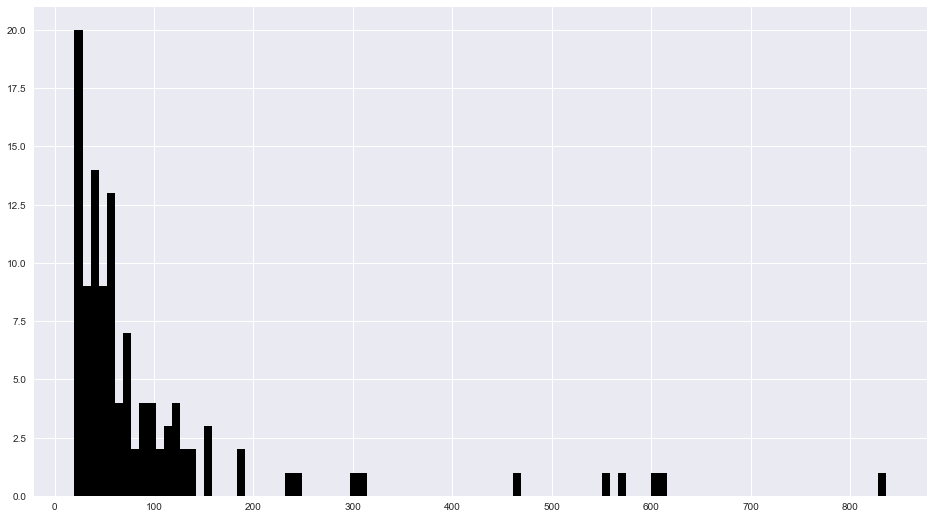

In [67]:
plt.hist(x = dead['Count'], bins= 100, color = 'k')

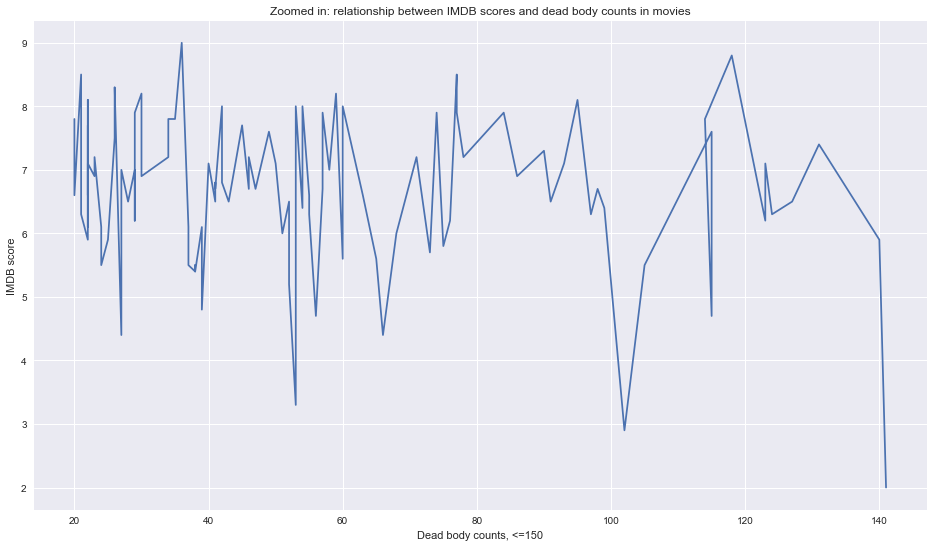

In [68]:
plt.plot(dead_zoomin['Count'], dead_zoomin['IMDB_score'])
plt.xlabel("Dead body counts, <=150")
plt.ylabel("IMDB score")
plt.title("Zoomed in: relationship between IMDB scores and dead body counts in movies")

In [69]:
import seaborn as sns

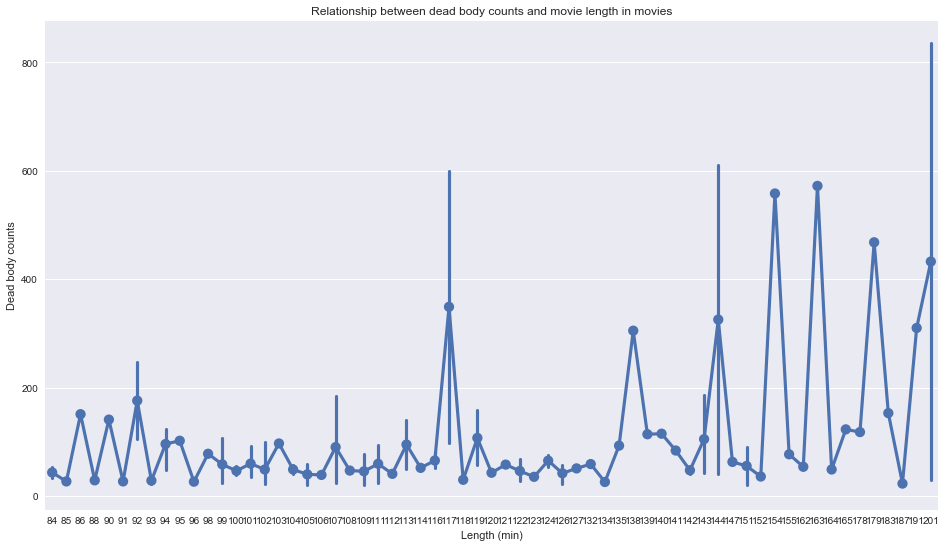

In [70]:
sns.pointplot(x = dead.Length_in_minute, y = dead.Count)
plt.ylabel("Dead body counts")
plt.xlabel("Length (min)")
plt.title("Relationship between dead body counts and movie length in movies")

In [71]:
count_per_min = pd.DataFrame(dead.Count / dead.Length_in_minute)
count_per_min.columns = ['Count_per_min']
count_per_min.head()

,Count_per_min
0,4.159204
1,4.236111
2,5.128205
3,3.509202
4,3.623377


In [72]:
dead_per_min = pd.concat([dead, count_per_min], axis=1)
dead_per_min.head()

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor,Count_per_min
0,836,LotR: Return of the King,2003,8.9,201,1981,4.159204
1,610,Kingdom of Heaven,2005,7.2,144,1977,4.236111
2,600,300,2007,7.7,117,1969,5.128205
3,572,Troy,2004,7.2,163,1963,3.509202
4,558,The Last Samurai,2003,7.7,154,1962,3.623377


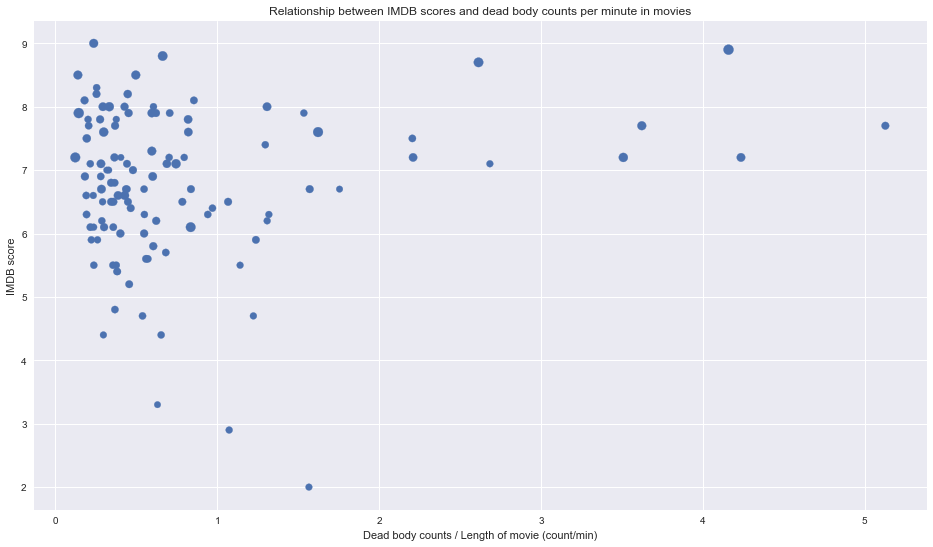

In [73]:
plt.scatter(dead_per_min.Count_per_min, dead_per_min.IMDB_score, s = dead_per_min.Length_in_minute/2)
plt.xlabel("Dead body counts / Length of movie (count/min)")
plt.ylabel("IMDB score")
plt.title("Relationship between IMDB scores and dead body counts per minute in movies")

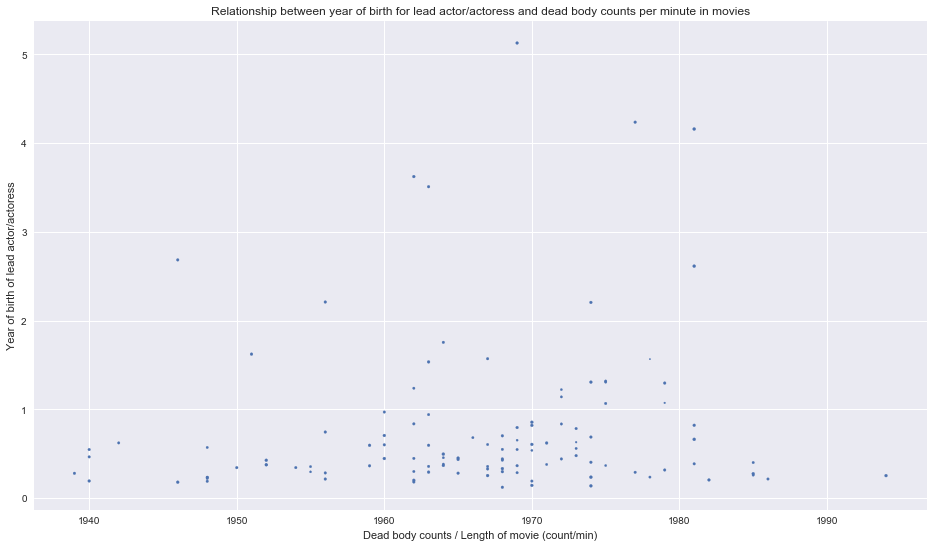

In [74]:
plt.scatter(dead_per_min.Year_of_birth_for_lead_actor, dead_per_min.Count_per_min, s = dead_per_min.IMDB_score)
plt.xlabel("Dead body counts / Length of movie (count/min)")
plt.ylabel("Year of birth of lead actor/actoress")
plt.title("Relationship between year of birth for lead actor/actoress and dead body counts per minute in movies")

In [75]:
import numpy as np

In [76]:
low_mid  = np.percentile(count_per_min, 33, axis=0)[0]
mid_high = np.percentile(count_per_min, 66, axis=0)[0]
print(low_mid, mid_high)

0.36028968254 0.64400990099


In [77]:
dead_per_min_low  = dead_per_min[dead_per_min.Count_per_min <= low_mid]
dead_per_min_mid  = dead_per_min[(dead_per_min.Count_per_min <= mid_high) & (dead_per_min.Count_per_min > low_mid)]
dead_per_min_high = dead_per_min[dead_per_min.Count_per_min > mid_high]
print(dead_per_min_low.shape, dead_per_min_mid.shape, dead_per_min_high.shape)

(38, 7) (37, 7) (39, 7)


In [78]:
dead_percentile_group = pd.cut(dead_per_min.Count_per_min, [0, low_mid, mid_high, max(dead_per_min.Count_per_min)], labels=['Low', 'Mid', 'High'])
dead_group = pd.cut(dead_per_min.Count_per_min, [0, max(dead_per_min.Count_per_min) / 3, max(dead_per_min.Count_per_min) / 3 * 2, max(dead_per_min.Count_per_min)], labels=['Low', 'Mid', 'High'])
dead_percentile_group_df = pd.DataFrame(dead_percentile_group)
dead_group_df = pd.DataFrame(dead_group)
dead_percentile_group_df.columns = ['Dead_counts_by_percentile_groups']
dead_group_df.columns = ['Dead_counts_by_groups']
dead_per_min_group = pd.concat([dead_per_min, dead_percentile_group_df, dead_group_df], axis=1)
dead_per_min_group.head()

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor,Count_per_min,Dead_counts_by_percentile_groups,Dead_counts_by_groups
0,836,LotR: Return of the King,2003,8.9,201,1981,4.159204,High,High
1,610,Kingdom of Heaven,2005,7.2,144,1977,4.236111,High,High
2,600,300,2007,7.7,117,1969,5.128205,High,High
3,572,Troy,2004,7.2,163,1963,3.509202,High,High
4,558,The Last Samurai,2003,7.7,154,1962,3.623377,High,High


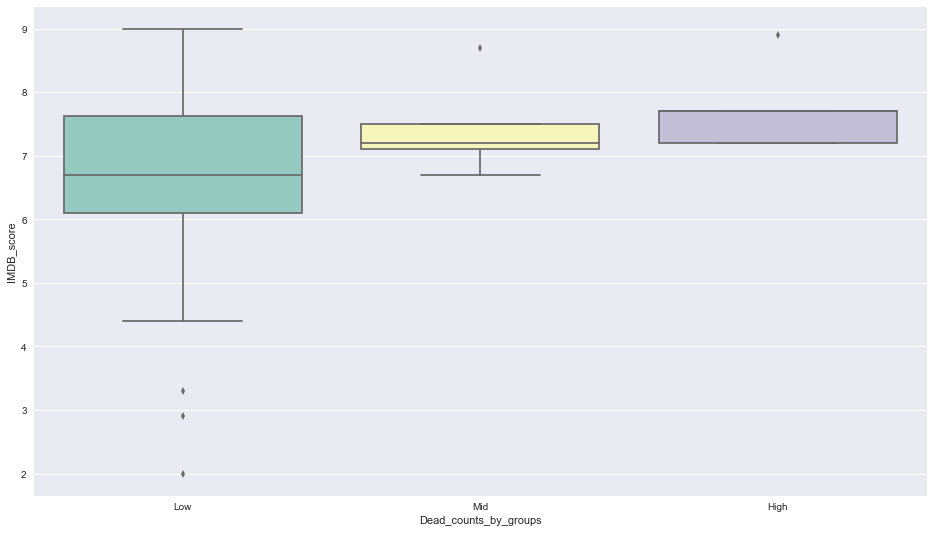

In [79]:
sns.boxplot(data = dead_per_min_group, x = 'Dead_counts_by_groups', y = 'IMDB_score', palette = 'Set3')

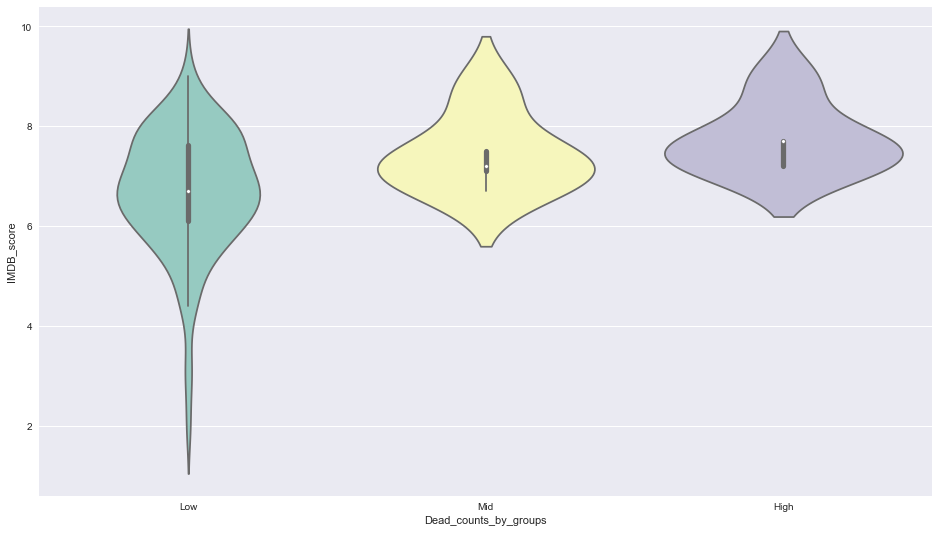

In [80]:
sns.violinplot(data = dead_per_min_group, x = 'Dead_counts_by_groups', y = 'IMDB_score', palette = 'Set3')

In [81]:
dead_per_min_group[dead_per_min_group.Dead_counts_by_groups == 'High']

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor,Count_per_min,Dead_counts_by_percentile_groups,Dead_counts_by_groups
0,836,LotR: Return of the King,2003,8.9,201,1981,4.159204,High,High
1,610,Kingdom of Heaven,2005,7.2,144,1977,4.236111,High,High
2,600,300,2007,7.7,117,1969,5.128205,High,High
3,572,Troy,2004,7.2,163,1963,3.509202,High,High
4,558,The Last Samurai,2003,7.7,154,1962,3.623377,High,High


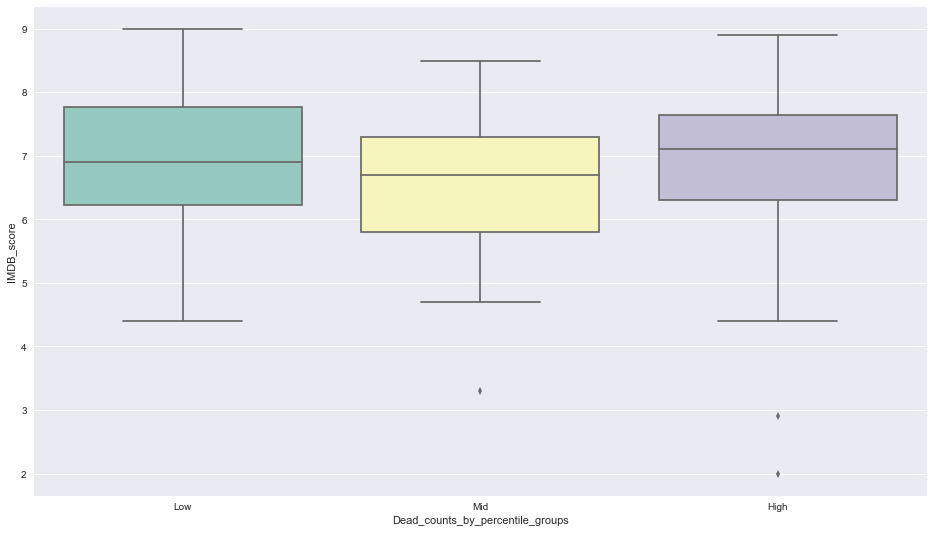

In [82]:
sns.boxplot(data = dead_per_min_group, x = 'Dead_counts_by_percentile_groups', y = 'IMDB_score', palette = 'Set3')

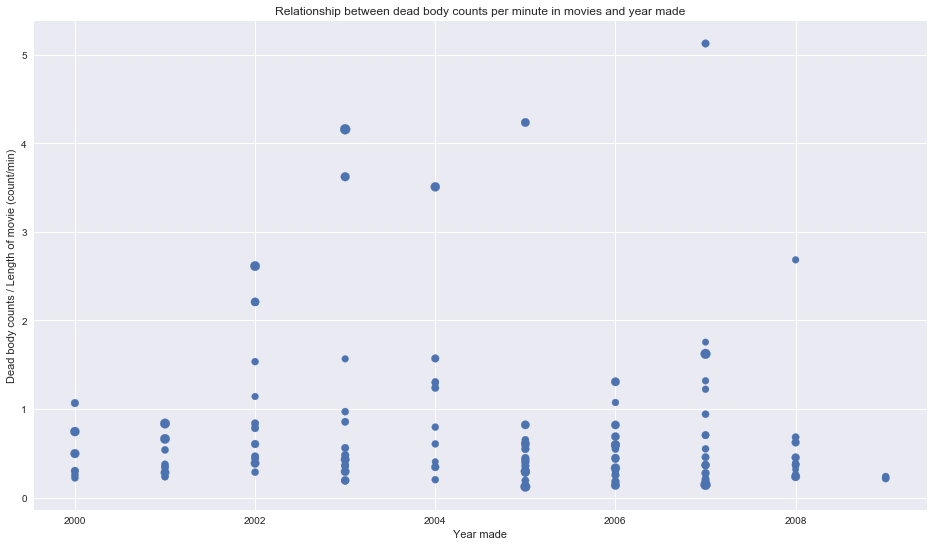

In [83]:
plt.scatter(dead_per_min.Year, dead_per_min.Count_per_min, s = dead_per_min.Length_in_minute/2)
plt.ylabel("Dead body counts / Length of movie (count/min)")
plt.xlabel("Year made")
plt.title("Relationship between dead body counts per minute in movies and year made")

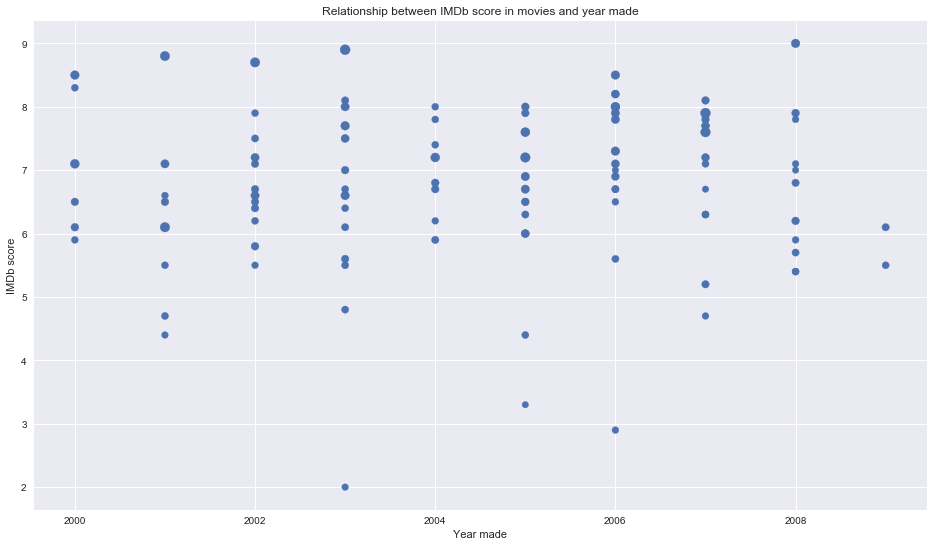

In [84]:
plt.scatter(dead_per_min.Year, dead_per_min.IMDB_score, s = dead_per_min.Length_in_minute/2)
plt.ylabel("IMDb score")
plt.xlabel("Year made")
plt.title("Relationship between IMDb score in movies and year made")

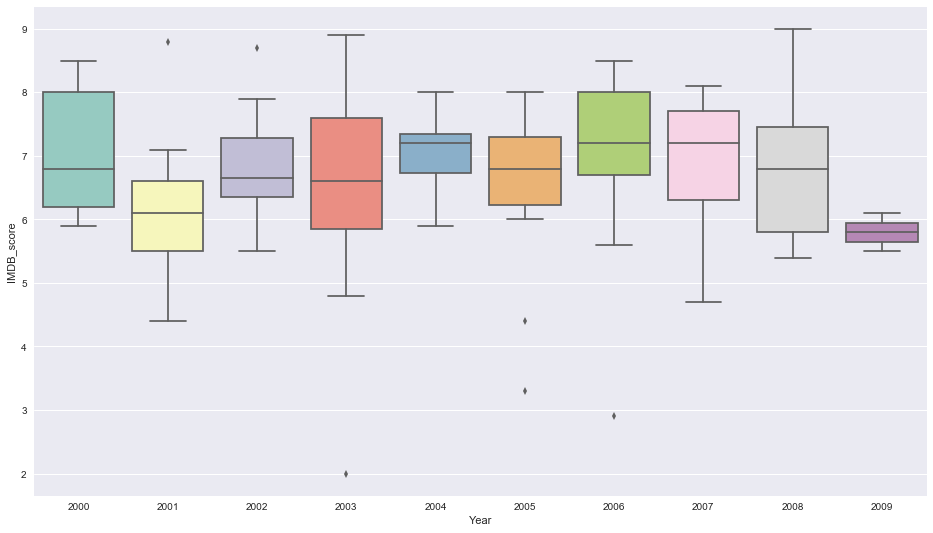

In [85]:
sns.boxplot(data = dead_per_min_group, x = 'Year', y = 'IMDB_score', palette = 'Set3')

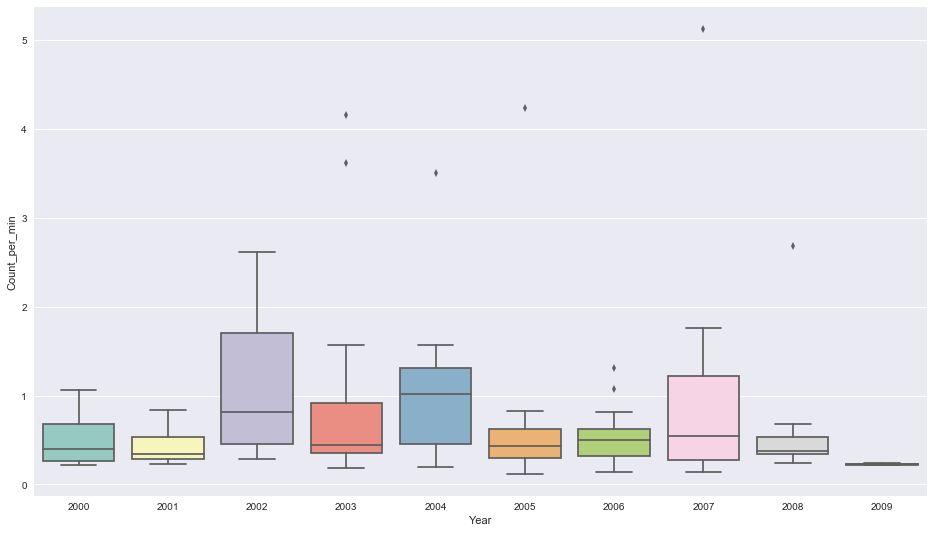

In [86]:
sns.boxplot(data = dead_per_min_group, x = 'Year', y = 'Count_per_min', palette = 'Set3')

In [87]:
thousand = pd.read_csv('../data/20170827-movie_stats-imdb_5000_movie_dataset_kaggle/movie stats - movie_metadata.csv')
thousand.head()

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [88]:
thousand.columns

Index(['movie_title', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

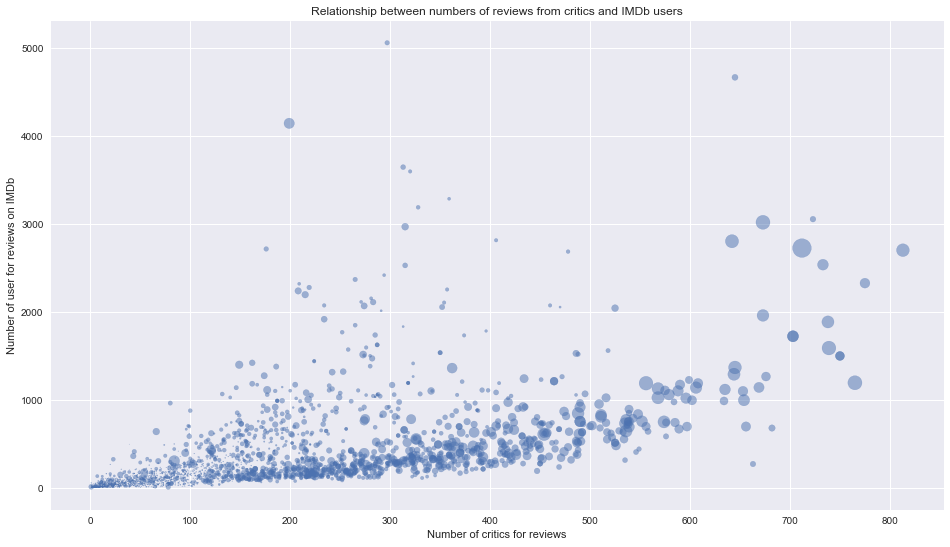

In [90]:
plt.scatter(thousand.num_critic_for_reviews, thousand.num_user_for_reviews, s = thousand.movie_facebook_likes/1000, alpha = 0.5)
plt.xlabel("Number of critics for reviews")
plt.ylabel("Number of user for reviews on IMDb")
plt.title("Relationship between numbers of reviews from critics and IMDb users")
plt.ylabel("Number of user for reviews on IMDb")
plt.title("Relationship between numbers of reviews from critics and IMDb users")

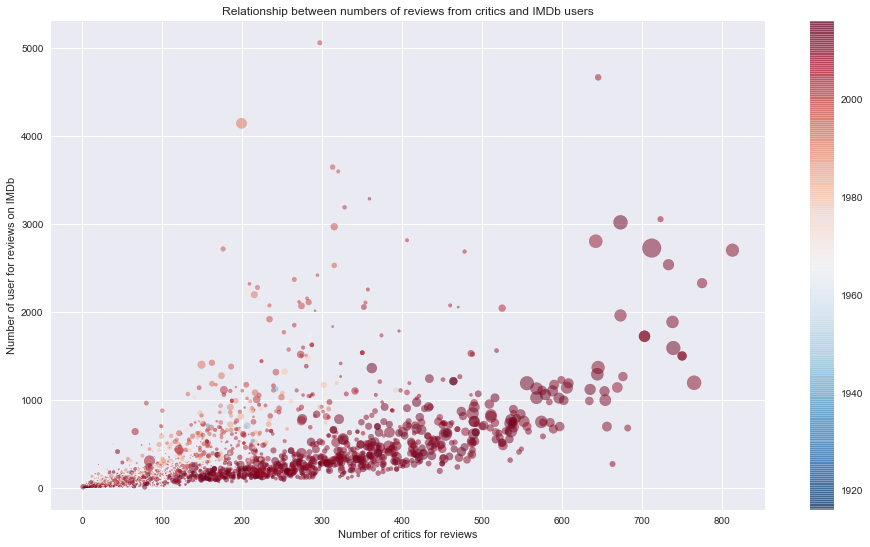

In [92]:
x = thousand.num_critic_for_reviews
y = thousand.num_user_for_reviews
s = thousand.movie_facebook_likes/1000
c = thousand.title_year
fig = plt.scatter(x, y , s = s, alpha = 0.5, c = c, cmap = "RdBu_r")
plt.xlabel("Number of critics for reviews")
plt.ylabel("Number of user for reviews on IMDb")
plt.title("Relationship between numbers of reviews from critics and IMDb users")
plt.colorbar(fig)

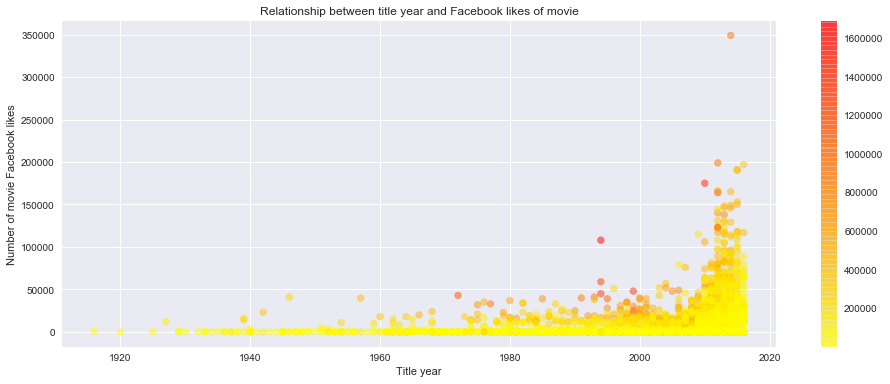

In [118]:
x = thousand.title_year
y = thousand.movie_facebook_likes
c = thousand.num_voted_users
fig = plt.scatter(x, y, alpha = 0.5, c = c, cmap = "autumn_r")
plt.xlabel("Title year")
plt.ylabel("Number of movie Facebook likes")
plt.title("Relationship between title year and Facebook likes of movie")
plt.colorbar(fig)

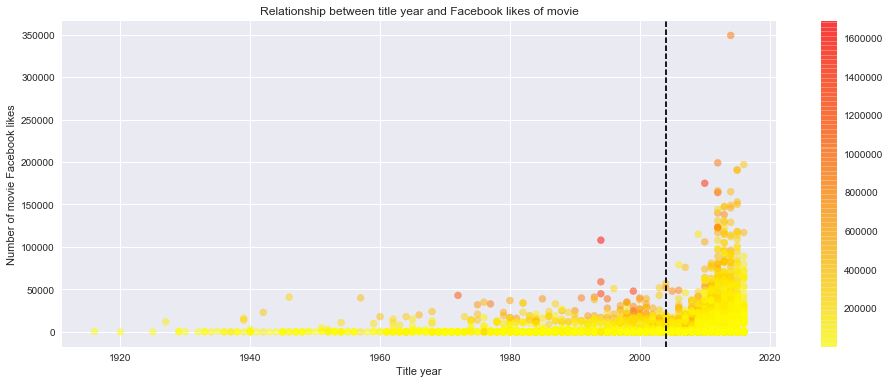

In [117]:
x = thousand.title_year
y = thousand.movie_facebook_likes
c = thousand.num_voted_users
fig = plt.scatter(x, y, alpha = 0.5, c = c, cmap = "autumn_r")
plt.axvline(x = 2004, color = 'k', linestyle = '--')
plt.xlabel("Title year")
plt.ylabel("Number of movie Facebook likes")
plt.title("Relationship between title year and Facebook likes of movie")
plt.colorbar(fig)

In [111]:
findDot = thousand[(thousand.movie_facebook_likes > 250000)]
print(findDot.to_string())

     movie_title  color      director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes   actor_2_name  actor_1_facebook_likes        gross                  genres         actor_1_name  num_voted_users  cast_total_facebook_likes   actor_3_name  facenumber_in_poster                                      plot_keywords                                    movie_imdb_link  num_user_for_reviews language country content_rating       budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
96  Interstellar  Color  Christopher Nolan                   712.0     169.0                  22000.0                  6000.0  Anne Hathaway                 11000.0  187991439.0  Adventure|Drama|Sci-Fi  Matthew McConaughey           928227                      31488  Mackenzie Foy                   1.0  black hole|father daughter relationship|saving...  http://www.imdb.com/title/tt0816692/?ref_=fn_t...                2725.0  English     US

In [112]:
findDot = thousand[(thousand.movie_facebook_likes > 100000) & (thousand.title_year < 2000)]
print(findDot.to_string())

                   movie_title  color   director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes    actor_2_name  actor_1_facebook_likes       gross       genres    actor_1_name  num_voted_users  cast_total_facebook_likes actor_3_name  facenumber_in_poster                                      plot_keywords                                    movie_imdb_link  num_user_for_reviews language country content_rating      budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
1937  The Shawshank Redemption  Color  Frank Darabont                   199.0     142.0                      0.0                   461.0  Jeffrey DeMunn                 11000.0  28341469.0  Crime|Drama  Morgan Freeman          1689764                      13495   Bob Gunton                   0.0  escape from prison|first person narration|pris...  http://www.imdb.com/title/tt0111161/?ref_=fn_t...                4144.0  English     USA              

In [124]:
findDot = thousand[(thousand.movie_facebook_likes > 0) & (thousand.title_year <=1925)]
print(findDot.to_string())

                                           movie_title             color  director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes    actor_2_name  actor_1_facebook_likes  gross             genres  actor_1_name  num_voted_users  cast_total_facebook_likes  actor_3_name  facenumber_in_poster                                      plot_keywords                                    movie_imdb_link  num_user_for_reviews language country content_rating    budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
4810  Intolerance: Love's Struggle Throughout the Ages   Black and White  D.W. Griffith                    69.0     123.0                    204.0                     9.0       Mae Marsh                   436.0    NaN  Drama|History|War  Lillian Gish            10718                        481   Walter Long                   1.0    huguenot|intolerance|medicis|protestant|wedding  http://www.imdb.com/title/tt0006864/

(array([  3.70200000e+03,   9.60000000e+01,   4.40000000e+01,
          1.40000000e+01,   2.30000000e+01,   8.90000000e+01,
          1.45000000e+02,   5.80000000e+01,   1.03000000e+02,
          8.10000000e+01,   7.20000000e+01,   2.70000000e+01,
          4.30000000e+01,   5.90000000e+01,   3.80000000e+01,
          2.00000000e+01,   3.50000000e+01,   2.70000000e+01,
          3.00000000e+01,   6.00000000e+00,   2.50000000e+01,
          2.70000000e+01,   2.70000000e+01,   1.00000000e+01,
          1.40000000e+01,   1.70000000e+01,   1.20000000e+01,
          6.00000000e+00,   7.00000000e+00,   1.10000000e+01,
          1.00000000e+01,   5.00000000e+00,   1.20000000e+01,
          1.00000000e+01,   9.00000000e+00,   6.00000000e+00,
          9.00000000e+00,   1.00000000e+01,   3.00000000e+00,
          0.00000000e+00,   9.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   7.00000000e+00,   5.00000000e+00,
        

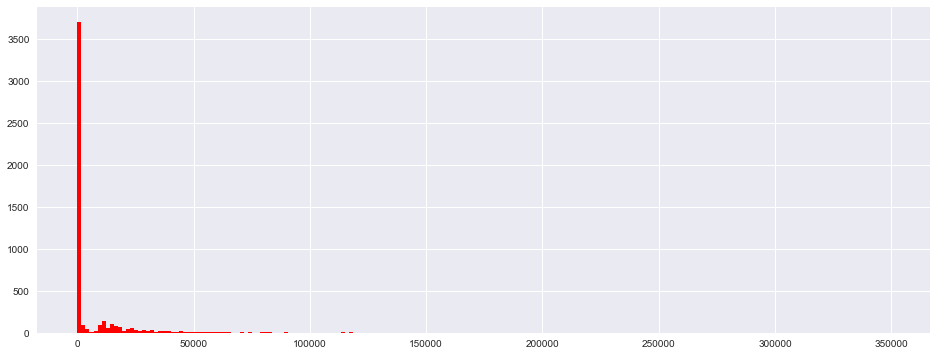

In [133]:
plt.hist(thousand.movie_facebook_likes, bins = 200, color = 'r')

In [140]:
movies = thousand

In [142]:
median = np.percentile(thousand.movie_facebook_likes, 50)
print(median)

166.0


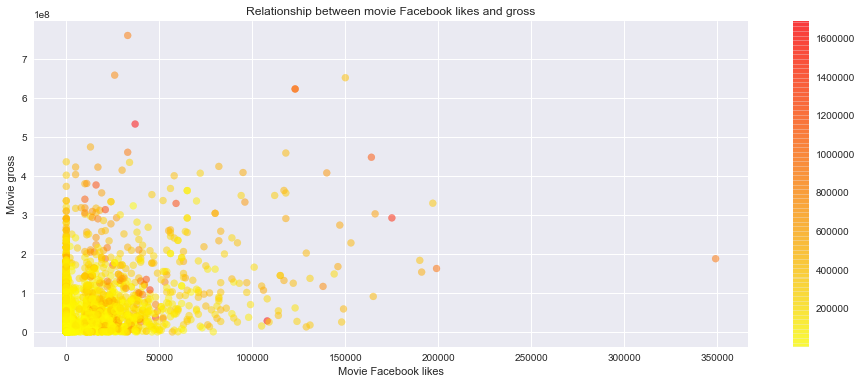

In [127]:
x = thousand.movie_facebook_likes
y = thousand.gross
c = thousand.num_voted_users
fig = plt.scatter(x, y, alpha = 0.5, c = c, cmap = "autumn_r")
plt.xlabel("Movie Facebook likes")
plt.ylabel("Movie gross")
plt.title("Relationship between movie Facebook likes and gross")
plt.colorbar(fig)

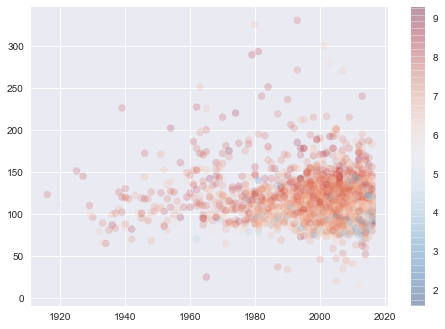

In [44]:
plt.scatter(x = thousand.title_year, y = thousand.duration, alpha = 0.2, c = thousand.imdb_score, cmap = "RdBu_r")
plt.colorbar()

In [127]:
findDot = thousand[(thousand.num_user_for_reviews > 4000) & (thousand.num_critic_for_reviews < 250) & (thousand.num_critic_for_reviews > 150)]
print(findDot.to_string())

      color   director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes    actor_2_name  actor_1_facebook_likes       gross       genres    actor_1_name                movie_title  num_voted_users  cast_total_facebook_likes actor_3_name  facenumber_in_poster                                      plot_keywords                                    movie_imdb_link  num_user_for_reviews language country content_rating      budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
1937  Color  Frank Darabont                   199.0     142.0                      0.0                   461.0  Jeffrey DeMunn                 11000.0  28341469.0  Crime|Drama  Morgan Freeman  The Shawshank Redemption           1689764                      13495   Bob Gunton                   0.0  escape from prison|first person narration|pris...  http://www.imdb.com/title/tt0111161/?ref_=fn_t...                4144.0  English     USA            

In [135]:
nameLen = list(map(len, dead_per_min_group.Film))
nameLen = pd.DataFrame(nameLen)
nameLen.columns = ['Length_of_film_name']
dead_per_min_group_len = pd.concat([dead_per_min_group, nameLen, dead_budget.Gross], axis=1)
dead_per_min_group_len.head()

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor,Count_per_min,Dead_counts_by_percentile_groups,Dead_counts_by_groups,Length_of_film_name,Gross
0,836,LotR: Return of the King,2003,8.9,201,1981,4.159204,High,High,24,NaN
1,610,Kingdom of Heaven,2005,7.2,144,1977,4.236111,High,High,17,47396698.0
2,600,300,2007,7.7,117,1969,5.128205,High,High,3,NaN
3,572,Troy,2004,7.2,163,1963,3.509202,High,High,4,133228348.0
4,558,The Last Samurai,2003,7.7,154,1962,3.623377,High,High,16,111110575.0


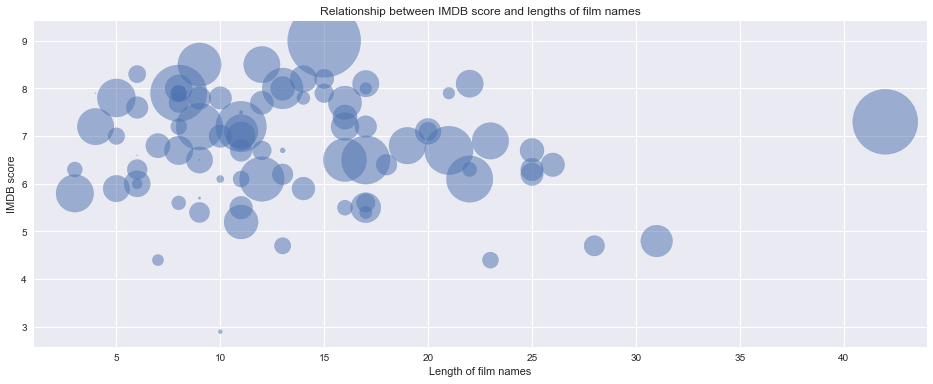

In [137]:
plt.scatter(dead_per_min_group_len.Length_of_film_name, dead_per_min_group_len.IMDB_score, s = dead_per_min_group_len.Gross/100000, alpha = 0.5)
plt.xlabel("Length of film names")
plt.ylabel("IMDB score")
plt.title("Relationship between IMDB score and lengths of film names")

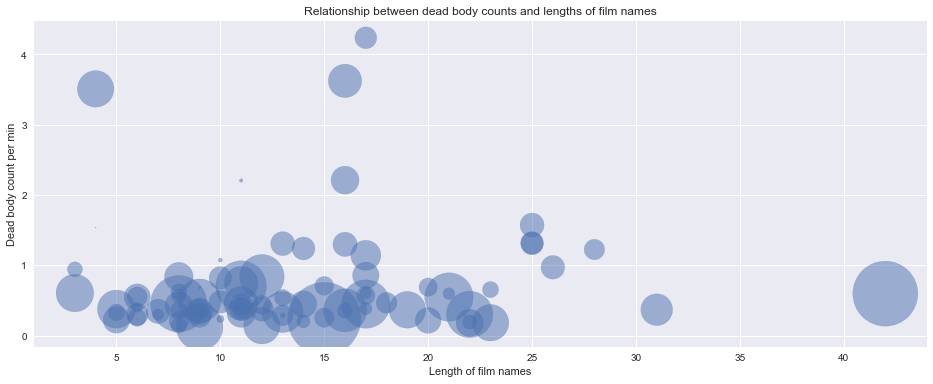

In [138]:
plt.scatter(dead_per_min_group_len.Length_of_film_name, dead_per_min_group_len.Count_per_min, s = dead_per_min_group_len.Gross/100000, alpha = 0.5)
plt.ylabel("Dead body count per min")
plt.xlabel("Length of film names")
plt.title("Relationship between dead body counts and lengths of film names")

In [48]:
dead_per_min_budget = pd.concat([dead_per_min, dead_budget.Budget, dead_budget.Gross], axis = 1)
dead_per_min_budget.head()

,Count,Film,Year,IMDB_score,Length_in_minute,Year_of_birth_for_lead_actor,Count_per_min,Budget,Gross
0,836,LotR: Return of the King,2003,8.9,201,1981,4.159204,94000000.0,NaN
1,610,Kingdom of Heaven,2005,7.2,144,1977,4.236111,130000000.0,47396698.0
2,600,300,2007,7.7,117,1969,5.128205,110000000.0,NaN
3,572,Troy,2004,7.2,163,1963,3.509202,175000000.0,133228348.0
4,558,The Last Samurai,2003,7.7,154,1962,3.623377,140000000.0,111110575.0


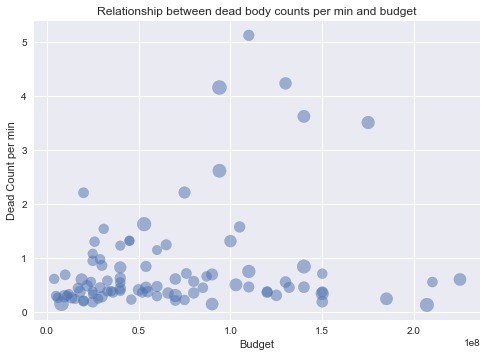

In [28]:
plt.scatter(dead_per_min_budget.Budget, dead_per_min_budget.Count_per_min, s = dead_per_min_budget.Length_in_minute, alpha = 0.5)
plt.xlabel("Budget")
plt.ylabel("Dead Count per min")
plt.title("Relationship between dead body counts per min and budgeplt.scatter(dead_per_min_budget.Budget, dead_per_min_budget.Count_per_min, s = dead_per_min_budget.Length_in_minute, alpha = 0.5)
plt.xlabel("Budget")
plt.ylabel("Dead Count per min")
plt.title("Relationship between dead body counts per min and budget")

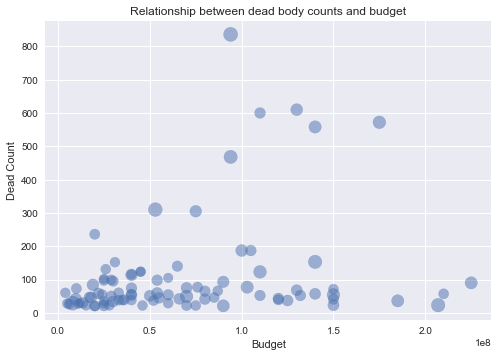

In [49]:
plt.scatter(dead_per_min_budget.Budget, dead_per_min_budget.Count, s = dead_per_min_budget.Length_in_minute, alpha = 0.5)
plt.xlabel("Budget")
plt.ylabel("Dead Count")
plt.title("Relationship between dead body counts and budget")

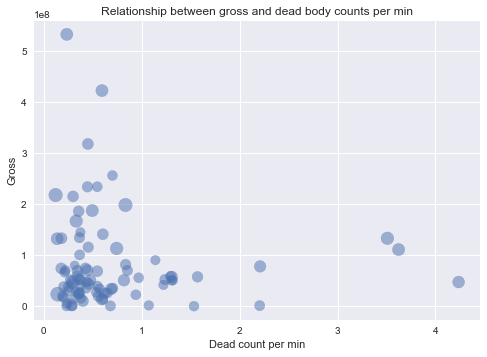

In [29]:
plt.scatter(dead_per_min_budget.Count_per_min, dead_per_min_budget.Gross, s = dead_per_min_budget.Length_in_minute, alpha = 0.5)
plt.xlabel("Dead count per min")
plt.ylabel("Gross")
plt.title("Relationship between gross and dead body counts per min")

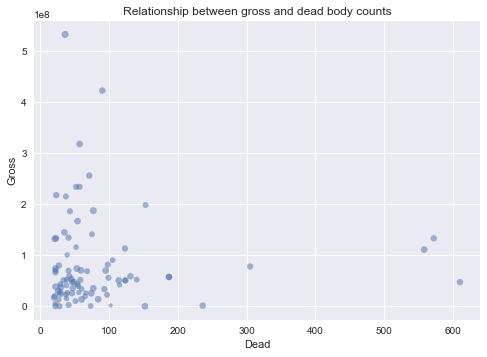

In [53]:
plt.scatter(dead_per_min_budget.Count, dead_per_min_budget.Gross, s = dead_per_min_budget.IMDB_score*5, alpha = 0.5)
plt.xlabel("Dead")
plt.ylabel("Gross")
plt.title("Relationship between gross and dead body counts")